# List Full Names of all the participants in your team below:

1. Aaron Liang
2. Misha Chekhov  
3. Vibhav Yawalkar
4. Gowtham Rajasekaran
5. Jordan Bailey
6. Nitish Dhinaharan
7. Ousman Kaba
8. Rishabh Kumar
9. Sindhu Pvp
10. Sougata Saha
11. Xingyu Chen
12. Yinxia Chen

Hello Machine Learning Engineer Sera Team, 

You have been given a data which is obtained from **Air Quality** of Seattle City. The dataset contains 788 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device.

Number of Instances: 789 <br>
Number of Attributes: 14 (including the target variable `y`)

Attribute Information: 
* **y**  AQI Air Quality Index
* **f1** True hourly averaged concentration CO in mg/m^3 (reference analyzer)
* **f2** PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
* **f3** True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
* **f4** True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
* **f5** PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
* **f6** True hourly averaged NOx concentration in ppb (reference analyzer)
* **f7** PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
* **f8** True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
* **f9** PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
* **f10** PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
* **f11** Temperature in Â°C
* **f12** Relative Humidity (%)
* **f13** AH Absolute Humidity

There are no missing Attribute Values.

Your task is to implement a Linear Regression model using **Closed Form Solution** for predicting the Air Quality Index for Seattle City.

## Closed Form Solution
The genesis equation for Linear Regression model is of the form:

$y = X.W$  where; <br>
$Y$ is output, <br>
$W$ are the parameters and <br>
 $T$ is the Target

For finding parameters $W$ for the above genesis using the **closed form solution** we pre-multiply by $X^{-1}$ on LHS and RHS. We get,

$W = X^{-1}Y$

But X is NOT A SQUARE MATRIX of FULL RANK! Hence, $X^{-1}$ is intractable.

We therefore use the Moore-Penrose pseudo inverse as a generalization of the matrix inverse when the matrix may not be invertible. Hence, the final closed form solution for finding parameters $W$ with linear regression least squares solution is as follows:

$W = (X^{T}X)^{-1}X^{T}Y$

YOU NEED TO IMPLEMENT ABOVE EQUATION for finding $W$. 

<font color="red"> YOU CANNOT USE NUMPY linalg **pinv** https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html </font>

<font color="red">DO NOT USE SKLEARNS LINEAR REGRESSION LIBRARY DIRECTLY.</font>

<font color="green">YOU CAN USE np.linalg.inv, and np.dot FOR IMPLEMENTING PSEUDO-INVERSE</font>

### **Question:** In the following code cell implement the following:
* Step 1: Import the dataset (AirQualitySeattle.csv) using Pandas Dataframe (Step 1 Implemented already)
* Step 2: Partition your dataset into training testing and validation using sklearns train_test_split library and split the features and target labels into seperate variables (Step 2 Implemented already)
* Step 3: Scale the features using sklearns min max scaling function (Step 3 Implemented already)
* Step 4: Convert Scaled Features and Labels into numpy arrays with dimensions required by closed form solution (Step 4 Implemented already)
* Step 5: Train using Linear Regression algorithm with a Closed Form Solution **Hint: Use Pseudo Inverse Formula**
* Step 6: Test using Testing Dataset
* Step 7: Calculate Root Mean Squared Error (Erms) for Test Dataset
    * $Erms = \frac{1}{n}\sqrt{(y\_test - y\_test\_pred)^{2}}$ 

In [ ]:
# Step 1 already implemented
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/Mihir2/BreakoutSessionDataset/master/AirQualitySeattle.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))
data

# Step 2 already implemented
import numpy as np
from sklearn.model_selection import train_test_split
output = data['y']
input = data.to_numpy()[:,1:]
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.2)

# Step 3 already implemented
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_xtrain = scaler.fit_transform(x_train)
sc_xtest = scaler.transform(x_test)

# Step 4 already implemented
y_train_arr = y_train.to_numpy().reshape(y_train.shape[0],1)
x_train_arr = sc_xtrain
y_test_arr  = y_test.to_numpy().reshape(y_test.shape[0],1)
x_test_arr  = sc_xtest

# Step 5
w = np.dot(np.linalg.inv(np.dot(x_train_arr.T, x_train_arr)), np.dot(x_train_arr.T,y_train_arr))

# Step 6
p = np.dot(x_test_arr, w)

# Step 7
Erms = np.mean(np.power(np.power(y_test_arr - p, 2),1/2))

In [ ]:
#np.linalg.inv, and np.dot
print(y_train_arr.shape, x_train_arr.shape, y_test_arr.shape, x_test_arr.shape)

(630, 1) (630, 13) (158, 1) (158, 13)


In [ ]:
w = np.dot(np.linalg.inv(np.dot(x_train_arr.T, x_train_arr)), np.dot(x_train_arr.T,y_train_arr))
print(w.shape)

(13, 1)


In [ ]:
p = np.dot(x_test_arr, w)
print(p.shape)

(158, 1)


In [ ]:
Erms = np.mean(np.power(np.power(y_test_arr - p, 2),1/2))
print(Erms)

96.77265578716693


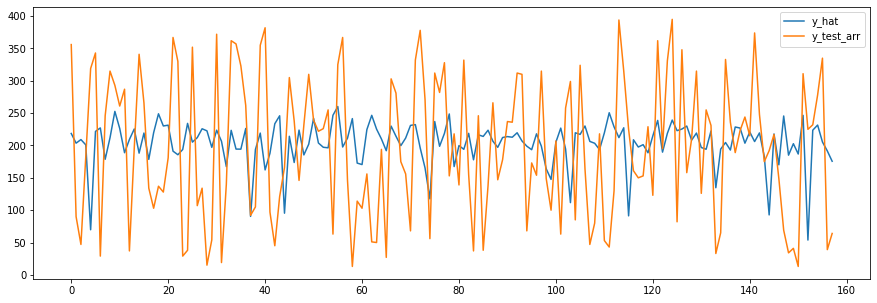

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(p, label = 'y_hat')
plt.plot(y_test_arr, label = 'y_test_arr')
plt.legend()
